In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pycaret.classification import *

In [2]:
emo_df = pd.read_csv('Emotion_classify_Data.csv')
emo_df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
print('Number of Null Values on emo_df: ')
print(emo_df.isna().sum())
print('\t')
print(f'Number of Duplicated Values on emo_df: {emo_df.duplicated().sum()}')

Number of Null Values on emo_df: 
Comment    0
Emotion    0
dtype: int64
	
Number of Duplicated Values on emo_df: 0


In [4]:
emo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [5]:
emo_df.shape

(5937, 2)

In [6]:

emo_df.describe(include='all')

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [7]:
anger_df = emo_df[emo_df['Emotion'] == 'anger']
anger_df.shape

(2000, 2)

In [8]:
fear_df = emo_df[emo_df['Emotion'] == 'fear']
fear_df.shape

(1937, 2)

In [9]:
joy_df = emo_df[emo_df['Emotion'] == 'joy']
joy_df.shape

(2000, 2)

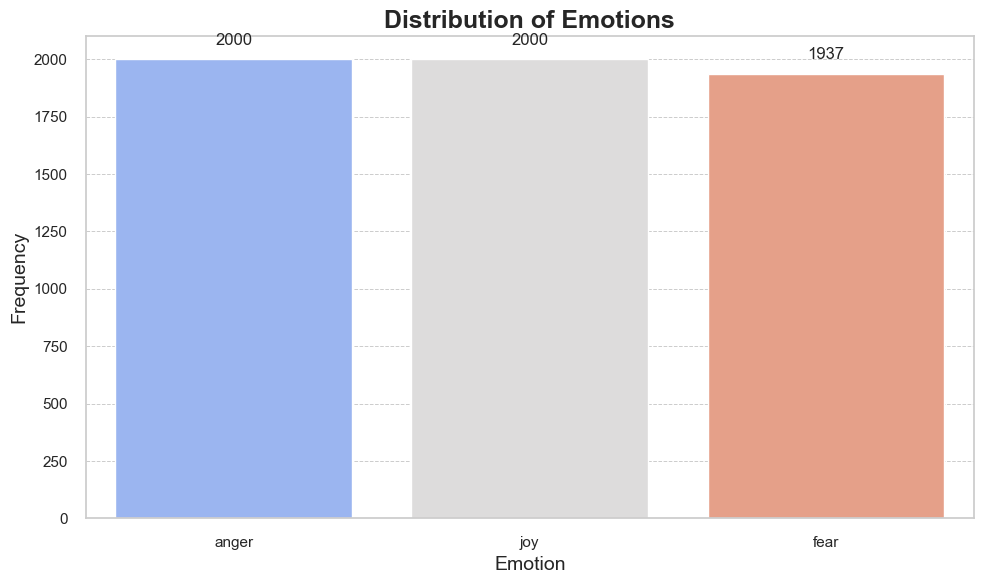

In [10]:
emotion_counts = emo_df['Emotion'].value_counts()

sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x=emotion_counts.index,
                       y=emotion_counts.values,
                       palette='coolwarm')

for i, value in enumerate(emotion_counts.values):
    bar_plot.text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=12)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.title('Distribution of Emotions', fontsize=18, fontweight='bold')
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

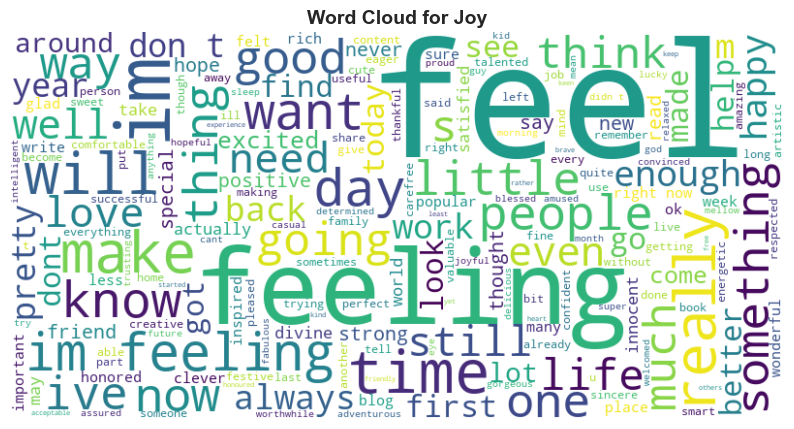

In [11]:
joy_comments = ' '.join(emo_df[emo_df['Emotion'] == 'joy']['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joy_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Joy', fontsize=14, fontweight='bold')
plt.show()

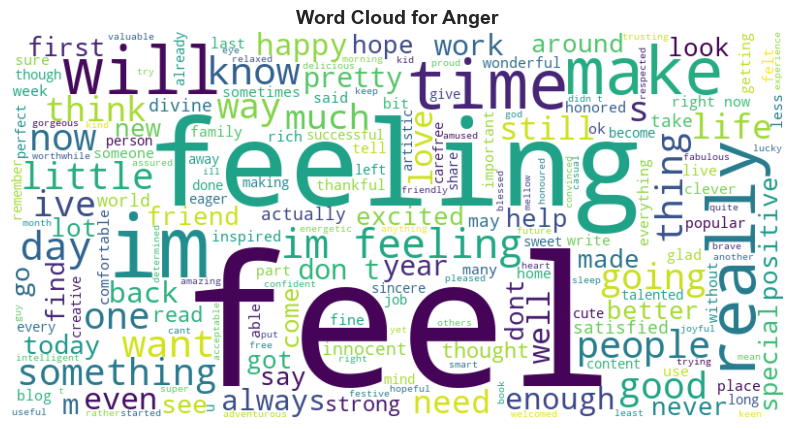

In [12]:
anger_comments = ' '.join(emo_df[emo_df['Emotion'] == 'anger']['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joy_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Anger', fontsize=14, fontweight='bold')
plt.show()

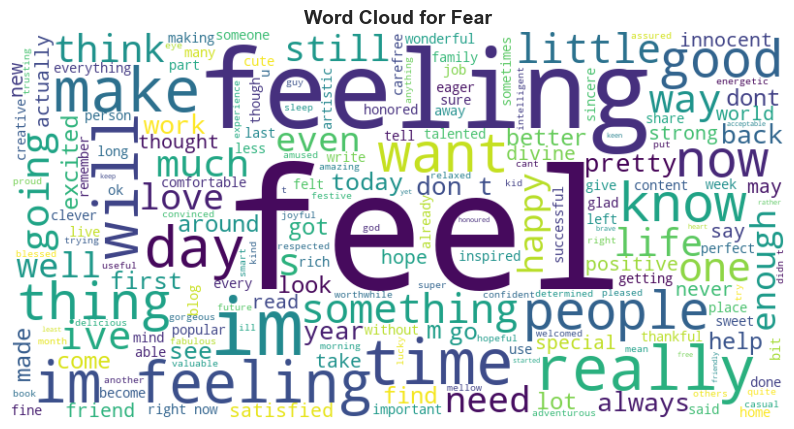

In [13]:
fear_comments = ' '.join(emo_df[emo_df['Emotion'] == 'fear']['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joy_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fear', fontsize=14, fontweight='bold')
plt.show()

In [14]:
new_df = emo_df.copy()

clf_setup = setup(data=new_df, target='Emotion', 
                  text_features=['Comment'], session_id=123)

,Description,Value
0,Session id,123
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2"
4,Original data shape,"(5937, 2)"
5,Transformed data shape,"(5937, 7335)"
6,Transformed train set shape,"(4155, 7335)"
7,Transformed test set shape,"(1782, 7335)"
8,Text features,1
9,Preprocess,True


In [15]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9350,0.9513,0.9350,0.9354,0.9351,0.9025,0.9026,0.9060
xgboost,Extreme Gradient Boosting,0.9297,0.9871,0.9297,0.9320,0.9296,0.8945,0.8957,3.7580
et,Extra Trees Classifier,0.9295,0.9854,0.9295,0.9303,0.9294,0.8942,0.8947,2.9710
svm,SVM - Linear Kernel,0.9290,0.0000,0.9290,0.9297,0.9290,0.8935,0.8939,0.6630
ridge,Ridge Classifier,0.9218,0.0000,0.9218,0.9220,0.9217,0.8827,0.8828,1.5740
rf,Random Forest Classifier,0.9054,0.9756,0.9054,0.9080,0.9054,0.8581,0.8593,1.3700
lr,Logistic Regression,0.9020,0.0000,0.9020,0.9030,0.9020,0.8530,0.8535,1.7330
gbc,Gradient Boosting Classifier,0.8977,0.0000,0.8977,0.9079,0.8981,0.8464,0.8512,12.5920
lightgbm,Light Gradient Boosting Machine,0.8590,0.9501,0.8590,0.8650,0.8592,0.7883,0.7911,0.7450
catboost,CatBoost Classifier,0.8526,0.8928,0.8526,0.8531,0.8525,0.8289,0.8292,28.2420


In [16]:
best_tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3942,0.5533,0.3942,0.4343,0.2749,0.0878,0.2123
1,0.3918,0.5557,0.3918,0.4468,0.2714,0.0841,0.2115
2,0.3966,0.5618,0.3966,0.4351,0.2812,0.0914,0.2135
3,0.3870,0.5497,0.3870,0.4316,0.2634,0.0768,0.1973
4,0.3918,0.5538,0.3918,0.7005,0.2784,0.0840,0.1985
5,0.3976,0.5586,0.3976,0.4229,0.2793,0.0920,0.2143
6,0.3831,0.5462,0.3831,0.4446,0.2565,0.0699,0.1920
7,0.4000,0.5635,0.4000,0.4243,0.2854,0.0957,0.2157
8,0.3952,0.5567,0.3952,0.7834,0.2796,0.0881,0.2161


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
selected_model = best_model
evaluate_model(selected_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predictions = predict_model(selected_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9394,0.9546,0.9394,0.9398,0.9394,0.9091,0.9093


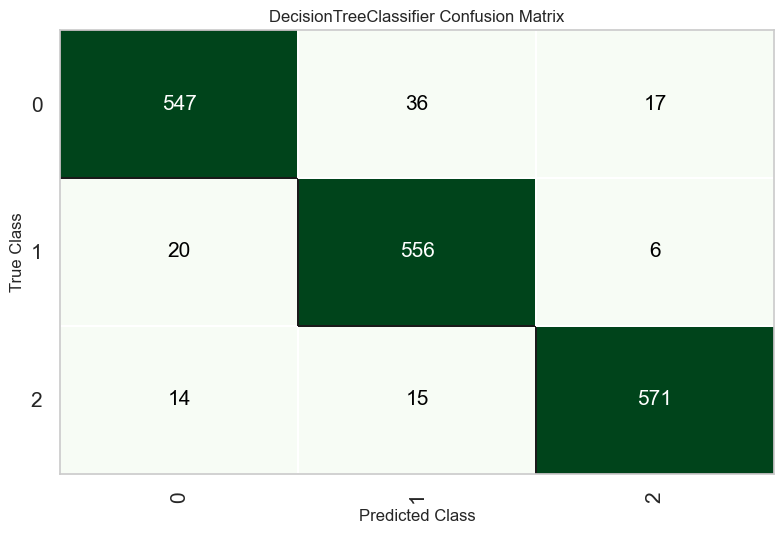

In [19]:
plot_model(selected_model, plot='confusion_matrix')